# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: M Mahfudl Awaludin
- Email:mahfudlawaludin.26@gmail.com

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Menyiapkan data yang akan diguankan

## Data Understanding

In [4]:
# Baca dataset
df = pd.read_csv("/content/employee_data (1).csv")  # Ganti dengan path lokal jika beda


In [6]:
# Lihat struktur data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [7]:
# Deskripsi statistik
print(df.describe())

        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0                 1.093082    2

In [8]:
# Cek nilai kosong
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## Data Preparation / Preprocessing

In [9]:
# Hapus baris dengan nilai kosong di kolom target
df = df.dropna(subset=["Attrition"])


In [10]:

# Ubah tipe target jadi integer
df["Attrition"] = df["Attrition"].astype(int)



<ipython-input-10-fa9a5ebd3fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition"] = df["Attrition"].astype(int)


In [11]:
# Label Encoding kolom kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


<ipython-input-11-60cac052fb7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-11-60cac052fb7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-11-60cac052fb7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [12]:

# Pisahkan fitur dan target
X = df.drop(columns=["EmployeeId", "Attrition"])
y = df["Attrition"]

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Modeling

In [13]:
# Inisiasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Training model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation

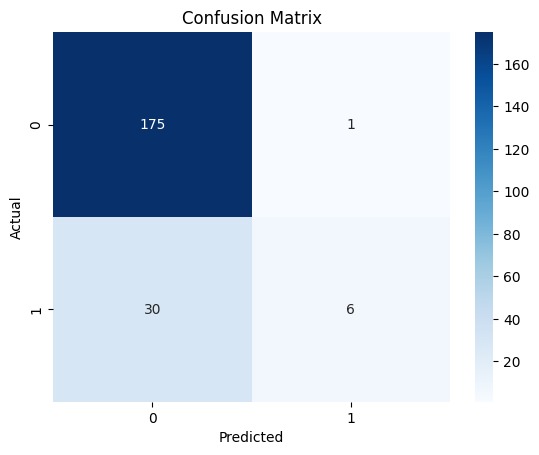

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       176
           1       0.86      0.17      0.28        36

    accuracy                           0.85       212
   macro avg       0.86      0.58      0.60       212
weighted avg       0.85      0.85      0.81       212



In [14]:
# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


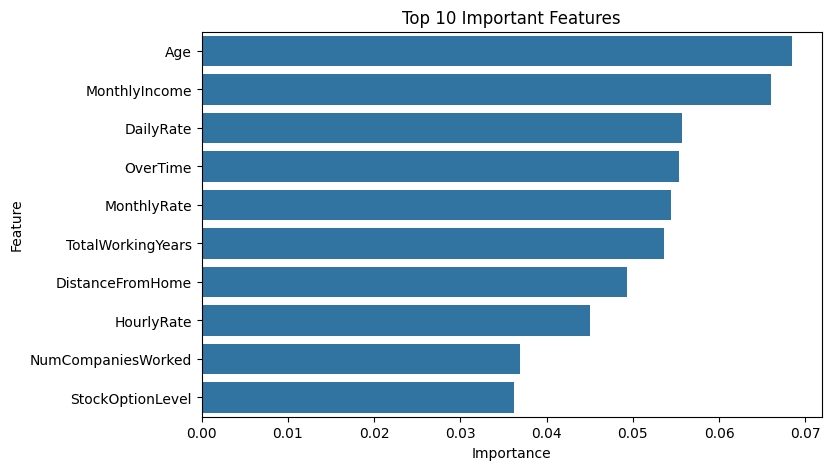

In [15]:
# Cek pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualisasi Top 10
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [16]:
import joblib
# 4. Simpan model dan scaler
joblib.dump(model, "model_attrition.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!


In [20]:
import pandas as pd
import joblib

# Load model & scaler
model = joblib.load("/content/model_attrition.pkl")
scaler = joblib.load("/content/scaler.pkl")

# Get the feature names the scaler was trained on
feature_names = scaler.get_feature_names_out() # Get the feature names the scaler was trained with

# Contoh data karyawan baru (bisa dari input user atau file)
# Angka ini harus sesuai urutan dan jumlah kolom seperti pada X saat training
data_baru = pd.DataFrame([[
    32,     # Age
    3,      # BusinessTravel
    2,      # DailyRate
    1,      # Department
    0,      # DistanceFromHome
    2,      # Education
    3,      # EducationField
    2,      # EnvironmentSatisfaction
    1,      # Gender
    5,      # JobLevel
    5000,   # MonthlyIncome
    3,      # JobSatisfaction
    0,      # MaritalStatus
    5,      # NumCompaniesWorked
    3,      # OverTime
    10      # TotalWorkingYears
    # Tambahkan fitur lainnya sesuai dataset kamu - Make sure to include all 33 features
]], columns=[
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
    'JobLevel', 'MonthlyIncome', 'JobSatisfaction', 'MaritalStatus',
    'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears'
    # Tambahkan nama fitur lainnya jika ada - Add the remaining feature names here
])


# Reindex data_baru to include all features, filling missing ones with 0
data_baru = data_baru.reindex(columns=feature_names, fill_value=0)


# Normalisasi
data_baru_scaled = scaler.transform(data_baru)

# Prediksi
prediksi = model.predict(data_baru_scaled)
hasil = "Akan Resign" if prediksi[0] == 1 else "Tidak Resign"

print(f"Hasil Prediksi: {hasil}")

Hasil Prediksi: Tidak Resign


In [18]:
df.to_csv("employee_cleaned_data.csv", index=False)


In [19]:
!pip freeze > requirements.txt
